In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sn
import pickle
import math
import imblearn

### Multiclass Classification

In [2]:
vulnerability_df = pd.read_pickle("D:\\PhD\\Model_Building\\Stage_6_ML_Model_Training\\Version_3.0\\proccessed_dataset_for_analysis.pickle")  

In [3]:
vulnerability_df = vulnerability_df.loc[vulnerability_df['Vulnerability_status'] == 1]
vulnerability_df = vulnerability_df[['processed_code','CWE_ID']]

In [4]:
vulnerability_df.CWE_ID.value_counts()

CWE-532    136565
CWE-312     24291
CWE-276      6382
CWE-200      5665
CWE-925      3392
CWE-939      2961
CWE-676      2378
CWE-89       2036
CWE-921      1914
CWE-749      1898
             1766
CWE-327       875
CWE-919       783
CWE-927       335
CWE-250       183
CWE-295       155
CWE-79        124
CWE-649        73
CWE-926        64
CWE-297        43
CWE-330        33
CWE-299        27
CWE-599         3
CWE-502         3
Name: CWE_ID, dtype: int64

In [5]:
# vulnerability_df = vulnerability_df[vulnerability_df.CWE_ID != ""]
vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("","Other")

In [6]:
vulnerability_df.CWE_ID.value_counts()

CWE-532    136565
CWE-312     24291
CWE-276      6382
CWE-200      5665
CWE-925      3392
CWE-939      2961
CWE-676      2378
CWE-89       2036
CWE-921      1914
CWE-749      1898
Other        1766
CWE-327       875
CWE-919       783
CWE-927       335
CWE-250       183
CWE-295       155
CWE-79        124
CWE-649        73
CWE-926        64
CWE-297        43
CWE-330        33
CWE-299        27
CWE-502         3
CWE-599         3
Name: CWE_ID, dtype: int64

In [7]:
vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-327","Other")
vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-919","Other")
vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-927","Other")
vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-250","Other")
vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-295","Other")
vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-79","Other")
vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-649","Other")
vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-926","Other")
vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-330","Other")
vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-299","Other")
vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-297","Other")
vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-502","Other")
vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-509","Other")

In [62]:
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-200","CWE-1")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-276","CWE-1")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-676","CWE-1")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-925","CWE-1")

# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-921","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("Other","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-89","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-939","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-749","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-327","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-919","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-927","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-250","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-295","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-79","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-926","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-649","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-330","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-299","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-297","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-502","CWE-2")
# vulnerability_df['CWE_ID'] = vulnerability_df['CWE_ID'].replace("CWE-599","CWE-2")

In [8]:
vulnerability_df.CWE_ID.value_counts()

CWE-532    136565
CWE-312     24291
CWE-276      6382
CWE-200      5665
Other        4464
CWE-925      3392
CWE-939      2961
CWE-676      2378
CWE-89       2036
CWE-921      1914
CWE-749      1898
CWE-599         3
Name: CWE_ID, dtype: int64

In [9]:
df_79 = c_79 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-79']
df_89 = c_89 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-89']
df_200 = c_200 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-200']
df_250 = c_250 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-250']
df_276 = c_276 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-276']
df_295 = c_295 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-295']
df_297 = c_297 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-297']
df_299 = c_299 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-299']
df_312 = c_312 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-312']
df_327 = c_327 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-327']
df_330 = c_330 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-330']
df_502 = c_502 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-502']
df_532 = c_532 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-532']
df_599 = c_599 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-599']
df_649 = c_649 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-649']
df_676 = c_676 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-676']
df_749 = c_749 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-749']
df_919 = c_919 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-919']
df_921 = c_921 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-921']
df_925 = c_925 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-925']
df_926 = c_926 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-926']
df_927 = c_927 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-927']
df_939 = c_939 = vulnerability_df[vulnerability_df.CWE_ID == 'CWE-939']
df_other = c_other = vulnerability_df[vulnerability_df.CWE_ID == 'Other']

In [10]:
df_532 = c_532.sample(9254)
df_312 = c_312.sample(7649)

In [11]:
# c_79_count = c_79.processed_code.count()
# c_89_count = c_89.processed_code.count()
# c_200_count = c_200.processed_code.count()
# c_250_count = c_250.processed_code.count()
# c_276_count = c_276.processed_code.count()
# c_295_count = c_295.processed_code.count()
# c_297_count = c_297.processed_code.count()
# c_299_count = c_299.processed_code.count()
# c_312_count = c_312.processed_code.count()
# c_327_count = c_327.processed_code.count()
# c_330_count = c_330.processed_code.count()
# c_502_count = c_502.processed_code.count()
# c_532_count = c_532.processed_code.count()
# c_599_count = c_599.processed_code.count()
# c_649_count = c_649.processed_code.count()
# c_676_count = c_676.processed_code.count()
# c_749_count = c_749.processed_code.count()
# c_919_count = c_919.processed_code.count()
# c_921_count = c_921.processed_code.count()
# c_925_count = c_925.processed_code.count()
# c_926_count = c_926.processed_code.count()
# c_927_count = c_927.processed_code.count()
# c_939_count = c_939.processed_code.count()
# c_other_count = c_other.processed_code.count()

In [12]:
# re_smpl_cat_1 = 15000
# re_smpl_cat_2 = 2500
# re_smpl_cat_3 = 1000
# re_smpl_cat_4 = 100

In [13]:
# if (c_79_count>=re_smpl_cat_1):
#     df_79 = c_79.sample(re_smpl_cat_1)
# elif (c_79_count>=re_smpl_cat_2):
#     df_79 = c_79.sample(re_smpl_cat_2)   
# elif (c_79_count>=re_smpl_cat_3):
#     df_79 = c_79.sample(re_smpl_cat_3)
# elif (c_79_count>=re_smpl_cat_4):
#     df_79 = c_79.sample(re_smpl_cat_4)
    
# if (c_89_count>=re_smpl_cat_1):
#     df_89 = c_89.sample(re_smpl_cat_1)
# elif (c_89_count>=re_smpl_cat_2):
#     df_89 = c_89.sample(re_smpl_cat_2)   
# elif (c_89_count>=re_smpl_cat_3):
#     df_89 = c_89.sample(re_smpl_cat_3)
# elif (c_89_count>=re_smpl_cat_4):
#     df_89 = c_89.sample(re_smpl_cat_4)
    
# if (c_200_count>=re_smpl_cat_1):
#     df_200 = c_200.sample(re_smpl_cat_1)
# elif (c_200_count>=re_smpl_cat_2):
#     df_200 = c_200.sample(re_smpl_cat_2)   
# elif (c_200_count>=re_smpl_cat_3):
#     df_200 = c_200.sample(re_smpl_cat_3)
# elif (c_200_count>=re_smpl_cat_4):
#     df_200 = c_200.sample(re_smpl_cat_4)

# if (c_250_count>=re_smpl_cat_1):
#     df_250 = c_250.sample(re_smpl_cat_1)
# elif (c_250_count>=re_smpl_cat_2):
#     df_250 = c_250.sample(re_smpl_cat_2)   
# elif (c_250_count>=re_smpl_cat_3):
#     df_250 = c_250.sample(re_smpl_cat_3)
# elif (c_250_count>=re_smpl_cat_4):
#     df_250 = c_250.sample(re_smpl_cat_4)

# if (c_276_count>=re_smpl_cat_1):
#     df_276 = c_276.sample(re_smpl_cat_1)
# elif (c_276_count>=re_smpl_cat_2):
#     df_276 = c_276.sample(re_smpl_cat_2)   
# elif (c_276_count>=re_smpl_cat_3):
#     df_276 = c_276.sample(re_smpl_cat_3)
# elif (c_276_count>=re_smpl_cat_4):
#     df_276 = c_276.sample(re_smpl_cat_4)

# if (c_295_count>=re_smpl_cat_1):
#     df_295 = c_295.sample(re_smpl_cat_1)
# elif (c_295_count>=re_smpl_cat_2):
#     df_295 = c_295.sample(re_smpl_cat_2)   
# elif (c_295_count>=re_smpl_cat_3):
#     df_295 = c_295.sample(re_smpl_cat_3)
# elif (c_295_count>=re_smpl_cat_4):
#     df_295 = c_295.sample(re_smpl_cat_4)

# if (c_297_count>=re_smpl_cat_1):
#     df_297 = c_297.sample(re_smpl_cat_1)
# elif (c_297_count>=re_smpl_cat_2):
#     df_297 = c_297.sample(re_smpl_cat_2)   
# elif (c_297_count>=re_smpl_cat_3):
#     df_297 = c_297.sample(re_smpl_cat_3)
# elif (c_297_count>=re_smpl_cat_4):
#     df_297 = c_297.sample(re_smpl_cat_4)

# if (c_299_count>=re_smpl_cat_1):
#     df_299 = c_299.sample(re_smpl_cat_1)
# elif (c_299_count>=re_smpl_cat_2):
#     df_299 = c_299.sample(re_smpl_cat_2)   
# elif (c_299_count>=re_smpl_cat_3):
#     df_299 = c_299.sample(re_smpl_cat_3)
# elif (c_299_count>=re_smpl_cat_4):
#     df_299 = c_299.sample(re_smpl_cat_4)

# if (c_312_count>=re_smpl_cat_1):
#     df_312 = c_312.sample(re_smpl_cat_1)
# elif (c_312_count>=re_smpl_cat_2):
#     df_312 = c_312.sample(re_smpl_cat_2)   
# elif (c_312_count>=re_smpl_cat_3):
#     df_312 = c_312.sample(re_smpl_cat_3)
# elif (c_312_count>=re_smpl_cat_4):
#     df_312 = c_312.sample(re_smpl_cat_4)

# if (c_327_count>=re_smpl_cat_1):
#     df_327 = c_327.sample(re_smpl_cat_1)
# elif (c_327_count>=re_smpl_cat_2):
#     df_327 = c_327.sample(re_smpl_cat_2)   
# elif (c_327_count>=re_smpl_cat_3):
#     df_327 = c_327.sample(re_smpl_cat_3)
# elif (c_327_count>=re_smpl_cat_4):
#     df_327 = c_327.sample(re_smpl_cat_4)

# if (c_330_count>=re_smpl_cat_1):
#     df_330 = c_330.sample(re_smpl_cat_1)
# elif (c_330_count>=re_smpl_cat_2):
#     df_330 = c_330.sample(re_smpl_cat_2)   
# elif (c_330_count>=re_smpl_cat_3):
#     df_330 = c_330.sample(re_smpl_cat_3)
# elif (c_330_count>=re_smpl_cat_4):
#     df_330 = c_330.sample(re_smpl_cat_4)

# if (c_502_count>=re_smpl_cat_1):
#     df_502 = c_502.sample(re_smpl_cat_1)
# elif (c_502_count>=re_smpl_cat_2):
#     df_502 = c_502.sample(re_smpl_cat_2)   
# elif (c_502_count>=re_smpl_cat_3):
#     df_502 = c_502.sample(re_smpl_cat_3)
# elif (c_502_count>=re_smpl_cat_4):
#     df_502 = c_502.sample(re_smpl_cat_4)

# if (c_532_count>=re_smpl_cat_1):
#     df_532 = c_532.sample(re_smpl_cat_1)
# elif (c_532_count>=re_smpl_cat_2):
#     df_532 = c_532.sample(re_smpl_cat_2)   
# elif (c_532_count>=re_smpl_cat_3):
#     df_532 = c_532.sample(re_smpl_cat_3)
# elif (c_532_count>=re_smpl_cat_4):
#     df_532 = c_532.sample(re_smpl_cat_4)

# if (c_599_count>=re_smpl_cat_1):
#     df_599 = c_599.sample(re_smpl_cat_1)
# elif (c_599_count>=re_smpl_cat_2):
#     df_599 = c_599.sample(re_smpl_cat_2)   
# elif (c_599_count>=re_smpl_cat_3):
#     df_599 = c_599.sample(re_smpl_cat_3)
# elif (c_599_count>=re_smpl_cat_4):
#     df_599 = c_599.sample(re_smpl_cat_4)

# if (c_649_count>=re_smpl_cat_1):
#     df_649 = c_649.sample(re_smpl_cat_1)
# elif (c_649_count>=re_smpl_cat_2):
#     df_649 = c_649.sample(re_smpl_cat_2)   
# elif (c_649_count>=re_smpl_cat_3):
#     df_649 = c_649.sample(re_smpl_cat_3)
# elif (c_649_count>=re_smpl_cat_4):
#     df_649 = c_649.sample(re_smpl_cat_4)

# if (c_676_count>=re_smpl_cat_1):
#     df_676 = c_676.sample(re_smpl_cat_1)
# elif (c_676_count>=re_smpl_cat_2):
#     df_676 = c_676.sample(re_smpl_cat_2)   
# elif (c_676_count>=re_smpl_cat_3):
#     df_676 = c_676.sample(re_smpl_cat_3)
# elif (c_676_count>=re_smpl_cat_4):
#     df_676 = c_676.sample(re_smpl_cat_4)

# if (c_749_count>=re_smpl_cat_1):
#     df_749 = c_749.sample(re_smpl_cat_1)
# elif (c_749_count>=re_smpl_cat_2):
#     df_749 = c_749.sample(re_smpl_cat_2)   
# elif (c_749_count>=re_smpl_cat_3):
#     df_749 = c_749.sample(re_smpl_cat_3)
# elif (c_749_count>=re_smpl_cat_4):
#     df_749 = c_749.sample(re_smpl_cat_4)

# if (c_919_count>=re_smpl_cat_1):
#     df_919 = c_919.sample(re_smpl_cat_1)
# elif (c_919_count>=re_smpl_cat_2):
#     df_919 = c_919.sample(re_smpl_cat_2)   
# elif (c_919_count>=re_smpl_cat_3):
#     df_919 = c_919.sample(re_smpl_cat_3)
# elif (c_919_count>=re_smpl_cat_4):
#     df_919 = c_919.sample(re_smpl_cat_4)

# if (c_921_count>=re_smpl_cat_1):
#     df_921 = c_921.sample(re_smpl_cat_1)
# elif (c_921_count>=re_smpl_cat_2):
#     df_921 = c_921.sample(re_smpl_cat_2)   
# elif (c_921_count>=re_smpl_cat_3):
#     df_921 = c_921.sample(re_smpl_cat_3)
# elif (c_921_count>=re_smpl_cat_4):
#     df_921 = c_921.sample(re_smpl_cat_4)

# if (c_925_count>=re_smpl_cat_1):
#     df_925 = c_925.sample(re_smpl_cat_1)
# elif (c_925_count>=re_smpl_cat_2):
#     df_925 = c_925.sample(re_smpl_cat_2)   
# elif (c_925_count>=re_smpl_cat_3):
#     df_925 = c_925.sample(re_smpl_cat_3)
# elif (c_925_count>=re_smpl_cat_4):
#     df_925 = c_925.sample(re_smpl_cat_4)

# if (c_926_count>=re_smpl_cat_1):
#     df_926 = c_926.sample(re_smpl_cat_1)
# elif (c_926_count>=re_smpl_cat_2):
#     df_926 = c_926.sample(re_smpl_cat_2)   
# elif (c_926_count>=re_smpl_cat_3):
#     df_926 = c_926.sample(re_smpl_cat_3)
# elif (c_926_count>=re_smpl_cat_4):
#     df_926 = c_926.sample(re_smpl_cat_4)

# if (c_927_count>=re_smpl_cat_1):
#     df_927 = c_927.sample(re_smpl_cat_1)
# elif (c_927_count>=re_smpl_cat_2):
#     df_927 = c_927.sample(re_smpl_cat_2)   
# elif (c_927_count>=re_smpl_cat_3):
#     df_927 = c_927.sample(re_smpl_cat_3)
# elif (c_927_count>=re_smpl_cat_4):
#     df_927 = c_927.sample(re_smpl_cat_4)

# if (c_939_count>=re_smpl_cat_1):
#     df_939 = c_939.sample(re_smpl_cat_1)
# elif (c_939_count>=re_smpl_cat_2):
#     df_939 = c_939.sample(re_smpl_cat_2)   
# elif (c_939_count>=re_smpl_cat_3):
#     df_939 = c_939.sample(re_smpl_cat_3)
# elif (c_939_count>=re_smpl_cat_4):
#     df_939 = c_939.sample(re_smpl_cat_4)
    
# if (c_other_count>=re_smpl_cat_1):
#     df_other = c_other.sample(re_smpl_cat_1)
# elif (c_other_count>=re_smpl_cat_2):
#     df_other = c_other.sample(re_smpl_cat_2)   
# elif (c_other_count>=re_smpl_cat_3):
#     df_other = c_other.sample(re_smpl_cat_3)
# elif (c_other_count>=re_smpl_cat_4):
#     df_other = c_other.sample(re_smpl_cat_4)



In [14]:
vulnerability_df = pd.concat([df_79, df_89,df_200,df_250,df_276,df_295,df_297,df_299,df_312,df_327,df_330,df_502,df_532,df_599,df_649,df_676,df_749,df_919,df_921,df_925,df_926,df_927,df_939,df_other], ignore_index=True)

In [15]:
counts = vulnerability_df.CWE_ID.value_counts()

In [16]:
print(counts)

CWE-532    9254
CWE-312    7649
CWE-276    6382
CWE-200    5665
Other      4464
CWE-925    3392
CWE-939    2961
CWE-676    2378
CWE-89     2036
CWE-921    1914
CWE-749    1898
CWE-599       3
Name: CWE_ID, dtype: int64


In [17]:
code_list = vulnerability_df.processed_code.tolist()
y = vulnerability_df.CWE_ID

sentences = code_list
y = y.values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1)
vectorizer = CountVectorizer(analyzer = 'word', lowercase=True, max_df=0.80, min_df=10, ngram_range=(1,3))
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

print(len(vectorizer.vocabulary_))

4851


C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     CWE-200       0.96      0.86      0.91      1469
     CWE-276       0.96      0.89      0.93      1611
     CWE-312       0.88      0.78      0.83      1907
     CWE-532       0.89      0.99      0.94      2254
     CWE-599       0.00      0.00      0.00         1
     CWE-676       0.88      1.00      0.94       593
     CWE-749       0.58      0.85      0.68       474
      CWE-89       0.96      0.99      0.98       517
     CWE-921       0.74      0.97      0.84       480
     CWE-925       0.90      1.00      0.95       810
     CWE-939       0.80      0.69      0.74       760
       Other       0.95      0.77      0.85      1123

    accuracy                           0.88     11999
   macro avg       0.79      0.82      0.80     11999
weighted avg       0.89      0.88      0.88     11999



<AxesSubplot:>

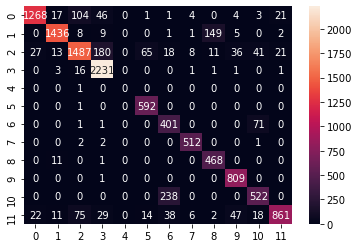

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_model = nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
cm = confusion_matrix(y_test, nb_predictions)
print(classification_report(y_test, nb_predictions))
sn.heatmap(cm, annot=True, fmt='g')

C:\Users\janak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     CWE-200       0.93      0.96      0.94      1469
     CWE-276       0.97      0.97      0.97      1611
     CWE-312       0.91      0.95      0.93      1907
     CWE-532       0.99      0.98      0.99      2254
     CWE-599       0.00      0.00      0.00         1
     CWE-676       1.00      1.00      1.00       593
     CWE-749       0.59      0.75      0.66       474
      CWE-89       1.00      0.99      1.00       517
     CWE-921       0.95      0.91      0.93       480
     CWE-925       0.98      1.00      0.99       810
     CWE-939       0.82      0.70      0.75       760
       Other       0.96      0.87      0.91      1123

    accuracy                           0.93     11999
   macro avg       0.84      0.84      0.84     11999
weighted avg       0.94      0.93      0.93     11999



C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

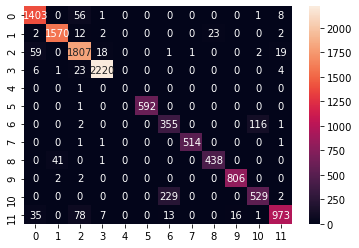

In [19]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_model = lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
cm = confusion_matrix(y_test, lr_predictions)
print(classification_report(y_test, lr_predictions))
sn.heatmap(cm, annot=True, fmt='g')

C:\Users\janak\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramet

              precision    recall  f1-score   support

     CWE-200       0.91      0.96      0.93      1469
     CWE-276       0.97      0.97      0.97      1611
     CWE-312       0.90      0.94      0.92      1907
     CWE-532       0.99      0.98      0.99      2254
     CWE-599       0.00      0.00      0.00         1
     CWE-676       1.00      1.00      1.00       593
     CWE-749       0.59      0.81      0.68       474
      CWE-89       1.00      1.00      1.00       517
     CWE-921       0.95      0.90      0.92       480
     CWE-925       0.98      0.99      0.99       810
     CWE-939       0.85      0.68      0.75       760
       Other       0.97      0.84      0.90      1123

    accuracy                           0.93     11999
   macro avg       0.84      0.84      0.84     11999
weighted avg       0.94      0.93      0.93     11999



<AxesSubplot:>

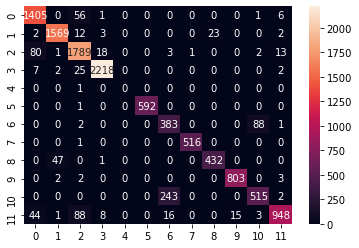

In [20]:
xgb_classifier = XGBClassifier(eval_metric='mlogloss')
xgb_model = xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
cm = confusion_matrix(y_test, xgb_predictions)
print(classification_report(y_test, xgb_predictions))
sn.heatmap(cm, annot=True, fmt='g')

              precision    recall  f1-score   support

     CWE-200       0.96      0.89      0.92      1469
     CWE-276       0.96      0.97      0.96      1611
     CWE-312       0.83      0.96      0.89      1907
     CWE-532       0.99      0.98      0.98      2254
     CWE-599       0.00      0.00      0.00         1
     CWE-676       1.00      0.99      1.00       593
     CWE-749       0.60      0.86      0.70       474
      CWE-89       1.00      1.00      1.00       517
     CWE-921       0.97      0.86      0.91       480
     CWE-925       0.97      0.99      0.98       810
     CWE-939       0.88      0.68      0.77       760
       Other       0.98      0.80      0.88      1123

    accuracy                           0.92     11999
   macro avg       0.84      0.83      0.83     11999
weighted avg       0.93      0.92      0.92     11999



<AxesSubplot:>

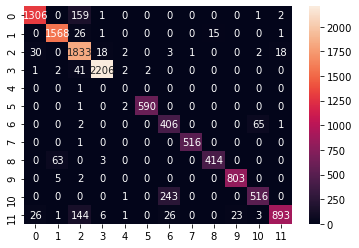

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_model = gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
cm = confusion_matrix(y_test, gb_predictions)
print(classification_report(y_test, gb_predictions))
sn.heatmap(cm, annot=True, fmt='g')

C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     CWE-200       0.92      0.96      0.94      1469
     CWE-276       0.96      0.97      0.96      1611
     CWE-312       0.91      0.93      0.92      1907
     CWE-532       0.98      0.99      0.98      2254
     CWE-599       0.00      0.00      0.00         1
     CWE-676       1.00      1.00      1.00       593
     CWE-749       0.54      0.68      0.60       474
      CWE-89       1.00      1.00      1.00       517
     CWE-921       0.93      0.87      0.90       480
     CWE-925       0.98      0.99      0.99       810
     CWE-939       0.77      0.65      0.71       760
       Other       0.96      0.86      0.91      1123

    accuracy                           0.92     11999
   macro avg       0.83      0.82      0.83     11999
weighted avg       0.93      0.92      0.92     11999



<AxesSubplot:>

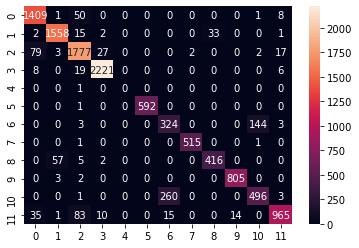

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_model = rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, rf_predictions)
print(classification_report(y_test, rf_predictions))
sn.heatmap(cm, annot=True, fmt='g')

C:\Users\janak\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-

              precision    recall  f1-score   support

     CWE-200       0.90      0.95      0.92      1469
     CWE-276       0.94      0.96      0.95      1611
     CWE-312       0.86      0.94      0.90      1907
     CWE-532       0.99      0.98      0.98      2254
     CWE-599       0.00      0.00      0.00         1
     CWE-676       1.00      1.00      1.00       593
     CWE-749       0.61      0.83      0.70       474
      CWE-89       1.00      0.99      0.99       517
     CWE-921       0.98      0.78      0.87       480
     CWE-925       0.96      0.99      0.98       810
     CWE-939       0.87      0.68      0.77       760
       Other       0.96      0.78      0.86      1123

    accuracy                           0.92     11999
   macro avg       0.84      0.82      0.83     11999
weighted avg       0.92      0.92      0.92     11999



<AxesSubplot:>

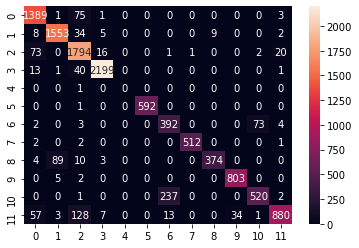

In [23]:
from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier(alpha=1, max_iter=100)
mlp_model = MLP_classifier.fit(X_train, y_train)
mlp_predictions = MLP_classifier.predict(X_test)
cm = confusion_matrix(y_test, mlp_predictions)
print(classification_report(y_test, mlp_predictions))
sn.heatmap(cm, annot=True, fmt='g')

C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     CWE-200       0.92      0.61      0.74      1469
     CWE-276       0.96      0.47      0.63      1611
     CWE-312       0.95      0.59      0.73      1907
     CWE-532       0.34      0.99      0.51      2254
     CWE-599       0.00      0.00      0.00         1
     CWE-676       1.00      0.37      0.54       593
     CWE-749       0.50      0.46      0.48       474
      CWE-89       1.00      0.44      0.62       517
     CWE-921       0.83      0.12      0.21       480
     CWE-925       1.00      0.59      0.74       810
     CWE-939       0.69      0.43      0.53       760
       Other       0.95      0.43      0.59      1123

    accuracy                           0.59     11999
   macro avg       0.76      0.46      0.53     11999
weighted avg       0.80      0.59      0.61     11999



<AxesSubplot:>

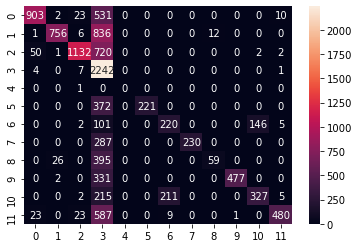

In [24]:
from sklearn.svm import SVC
SVC_classifier = SVC(gamma=2, C=1)
svc_model = SVC_classifier.fit(X_train, y_train)
svc_predictions = SVC_classifier.predict(X_test)
cm = confusion_matrix(y_test, svc_predictions)
print(classification_report(y_test, svc_predictions))
sn.heatmap(cm, annot=True, fmt='g')

C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     CWE-200       0.91      0.96      0.93      1469
     CWE-276       0.96      0.96      0.96      1611
     CWE-312       0.91      0.92      0.91      1907
     CWE-532       0.98      0.98      0.98      2254
     CWE-599       0.00      0.00      0.00         1
     CWE-676       1.00      1.00      1.00       593
     CWE-749       0.55      0.74      0.63       474
      CWE-89       0.99      1.00      1.00       517
     CWE-921       0.90      0.87      0.89       480
     CWE-925       0.99      0.99      0.99       810
     CWE-939       0.80      0.63      0.70       760
       Other       0.95      0.87      0.91      1123

    accuracy                           0.92     11999
   macro avg       0.83      0.83      0.82     11999
weighted avg       0.92      0.92      0.92     11999



<AxesSubplot:>

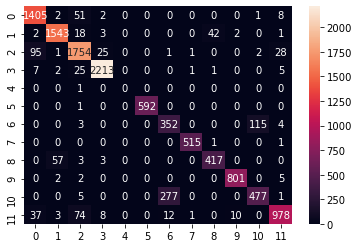

In [25]:
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_model = dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
cm = confusion_matrix(y_test, dt_predictions)
print(classification_report(y_test, dt_predictions))
sn.heatmap(cm, annot=True, fmt='g')

In [26]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('nb', nb_classifier),
    ('lr', lr_classifier),
    ('xgb', xgb_classifier),
    ('gb', gb_classifier),
    ('rf', rf_classifier),
    ('mlp', MLP_classifier),
    ('svc', SVC_classifier),
    ('dt', dt_classifier)
    
]

stack_model = StackingClassifier(
    estimators =estimator_list, final_estimator = LogisticRegression())

C:\Users\janak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\janak\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\janak\anaconda3\lib\sit

C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     CWE-200       0.94      0.96      0.95      1469
     CWE-276       0.97      0.97      0.97      1611
     CWE-312       0.92      0.95      0.93      1907
     CWE-532       0.98      0.99      0.99      2254
     CWE-599       0.00      0.00      0.00         1
     CWE-676       1.00      1.00      1.00       593
     CWE-749       0.67      0.81      0.73       474
      CWE-89       1.00      1.00      1.00       517
     CWE-921       0.94      0.91      0.92       480
     CWE-925       0.99      0.99      0.99       810
     CWE-939       0.87      0.76      0.81       760
       Other       0.96      0.89      0.92      1123

    accuracy                           0.94     11999
   macro avg       0.85      0.85      0.85     11999
weighted avg       0.94      0.94      0.94     11999



<AxesSubplot:>

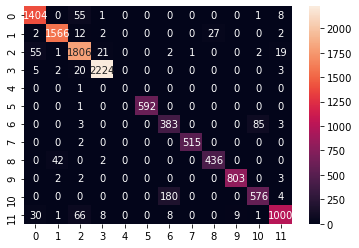

In [27]:
stack_model_new = stack_model.fit(X_train, y_train)
stack_predictions = stack_model_new.predict(X_test)
cm = confusion_matrix(y_test, stack_predictions)
print(classification_report(y_test, stack_predictions))
sn.heatmap(cm, annot=True, fmt='g')

In [29]:
with open("multiclass_model.pickle", 'wb') as fout:
    pickle.dump((vectorizer, stack_model_new, stack_model), fout)